13/05/2021

1. Abbiamo sistemato l'ora (ora solare)
2. Sistemato il plot della serie storica
3. Boxplot e altre cose per anno/mese

01/07/2021

U6:
  1. Aggiunte date mancanti
  2. Dati meteo integrati




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# DISPLAY PANDAS DATAFRAMES AS INTERACTIVE TABLES
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
from datetime import timedelta

# **PREPROCESSING U1**


*   mappature in ore
*   gestione corretta delle date
*   correzione ora legale

In seguito a queste operazioni, il CSV finale è processato ed interpolato in R.





In [ ]:
### PATH DATI
# !!! MODIFICARE IN BASE AL PROPRIO DRIVE

path_u1 = "/content/drive/MyDrive/DS LAB/DATA/U1_completo.csv"
path_u6 = '/content/drive/MyDrive/DS LAB/DATA/U6_completo.csv'

In [ ]:
data_u1 = pd.read_csv(path_u1)
data_u1.dropna(subset = ['POD'], inplace=True)
data_u1['DATA'] = data_u1['DATA'].astype('int')
data_u1.shape

(111044, 8)

In [ ]:
data_u1['DATA'] = pd.to_datetime(data_u1['DATA'], format = '%Y%m%d').dt.strftime('%Y-%m-%d')
data_u1.head()

,POD,DATA,ORA,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO
0,IT012E00491869,2018-08-01,1500.0,2.0,100.8,42.0,547.2,E
1,IT012E00491869,2018-08-01,3000.0,2.0,103.2,43.8,547.2,E
2,IT012E00491869,2018-08-01,4500.0,2.0,100.8,43.2,547.2,E
3,IT012E00491869,2018-08-01,10000.0,2.0,98.4,42.6,547.2,E
4,IT012E00491869,2018-08-01,11500.0,2.0,102.0,45.6,547.2,E


In [ ]:
# eliminiamo i duplicati e ricordiamoci che il numero di righe non è perfettamente 105.216 in quanto mancheranno degli slot orari
data_u1.drop_duplicates(subset=['DATA','ORA'], keep = 'first', inplace=True)

In [ ]:
# funzione per convertire l'ora nel formato HH:MM
list_hours = data_u1.ORA.unique()
dict_hours = {}
for time in list_hours:
  value = str(time/10000)
  if len(value) == 3:
    value = f"0{value}0"
  elif len(value) == 4:
    splitted_str = value.split('.')
    hour = splitted_str[0]
    minutes = splitted_str[1]
    if len(hour) == 1:
      hour = f"0{hour}"
    if len(minutes) == 1:
      minutes = f"{minutes}0"
    value = ':'.join([hour,minutes])
  value = str(value).replace('.',':')
  dict_hours[time] = value

In [ ]:
## mappare ore da minuti a HH:MM
data_u1['ORA'] = data_u1['ORA'].replace(dict_hours)

In [ ]:
data_u1['DATA'] = pd.to_datetime(data_u1['DATA'], format = '%Y-%m-%d').dt.date
# CONVERSIONE DA ORA LEGALE A SOLARE
data_u1['DATA'] = data_u1['DATA'].astype('str') + ' ' + data_u1['ORA']
data_u1['DATA'] = pd.to_datetime(data_u1['DATA'])
# sottraggo un'ora
data_u1.loc[data_u1['FL_ORA_LEGALE'] == 2, 'DATA'] = data_u1['DATA'] - timedelta(hours=1)

In [ ]:
data_u1['ORA'] = data_u1['DATA'].dt.time
data_u1.head()

,POD,DATA,ORA,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO
0,IT012E00491869,2018-07-31 23:15:00,23:15:00,2.0,100.8,42.0,547.2,E
1,IT012E00491869,2018-07-31 23:30:00,23:30:00,2.0,103.2,43.8,547.2,E
2,IT012E00491869,2018-07-31 23:45:00,23:45:00,2.0,100.8,43.2,547.2,E
3,IT012E00491869,2018-08-01 00:00:00,00:00:00,2.0,98.4,42.6,547.2,E
4,IT012E00491869,2018-08-01 00:15:00,00:15:00,2.0,102.0,45.6,547.2,E


## Creazione grafico con date ordinate (**U1**)

In [ ]:
# ordina i dati per data e ora
data_u1 = data_u1.sort_values(by=['DATA'])

In [ ]:
data_u1['CONSUMO_ATTIVA_PRELEVATA'] = data_u1['CONSUMO_ATTIVA_PRELEVATA'].str.replace(',','.')
data_u1['CONSUMO_ATTIVA_PRELEVATA'] = data_u1['CONSUMO_ATTIVA_PRELEVATA'].astype('float')
data_u1.dtypes

POD                                             object
DATA                                    datetime64[ns]
ORA                                             object
FL_ORA_LEGALE                                  float64
CONSUMO_ATTIVA_PRELEVATA                       float64
CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA            object
POTENZA_MASSIMA                                float64
TIPO_DATO                                       object
dtype: object

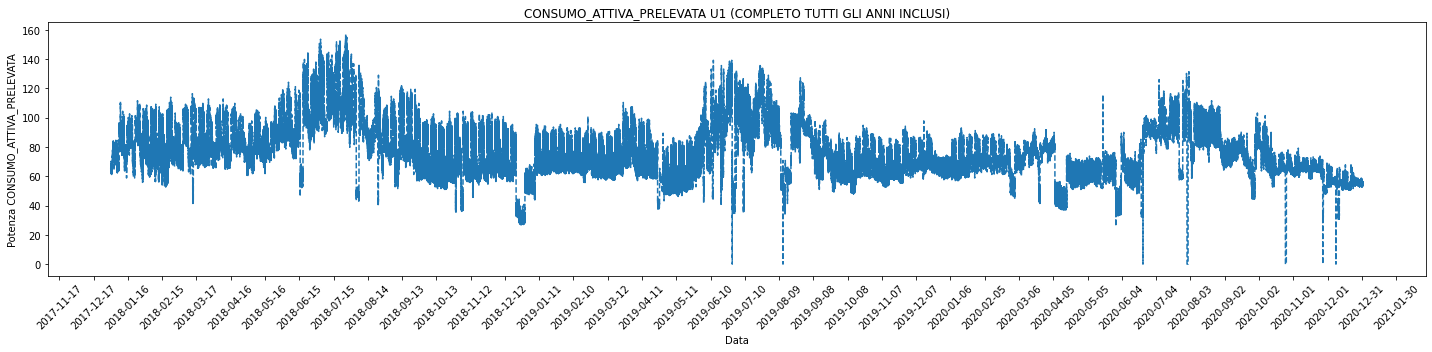

In [ ]:
# intervallo di giorni tra una data sull'asse x e l'altra
tick_spacing = 30

# crea lo spazio di plot
fig, ax = plt.subplots(figsize=(20, 5))

# matplotlib per visualizzare le x e le y e il colore
ax.plot(data_u1["DATA"], data_u1["CONSUMO_ATTIVA_PRELEVATA"].values  , linestyle='dashed')

# setta label asse x e y
ax.set(xlabel = "Data", ylabel="Potenza CONSUMO_ATTIVA_PRELEVATA", title="CONSUMO_ATTIVA_PRELEVATA U1 (COMPLETO TUTTI GLI ANNI INCLUSI)")

# setta la spaziatura fra le date
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# ruota le date di 45 gradi
plt.xticks(rotation=45)
fig.tight_layout()

# plotta
plt.show()

In [ ]:
# vi sono alcuni giorni in cui il entrambi i consumi sono pari a zero 
# (questi potrebbero essere trattati come outliers)
data_u1[data_u1['CONSUMO_ATTIVA_PRELEVATA']==0]['DATA'].dt.date.unique()

array([datetime.date(2019, 6, 28), datetime.date(2019, 8, 12),
       datetime.date(2020, 6, 22), datetime.date(2020, 7, 30),
       datetime.date(2020, 7, 31), datetime.date(2020, 10, 25),
       datetime.date(2020, 11, 26), datetime.date(2020, 12, 8)],
      dtype=object)

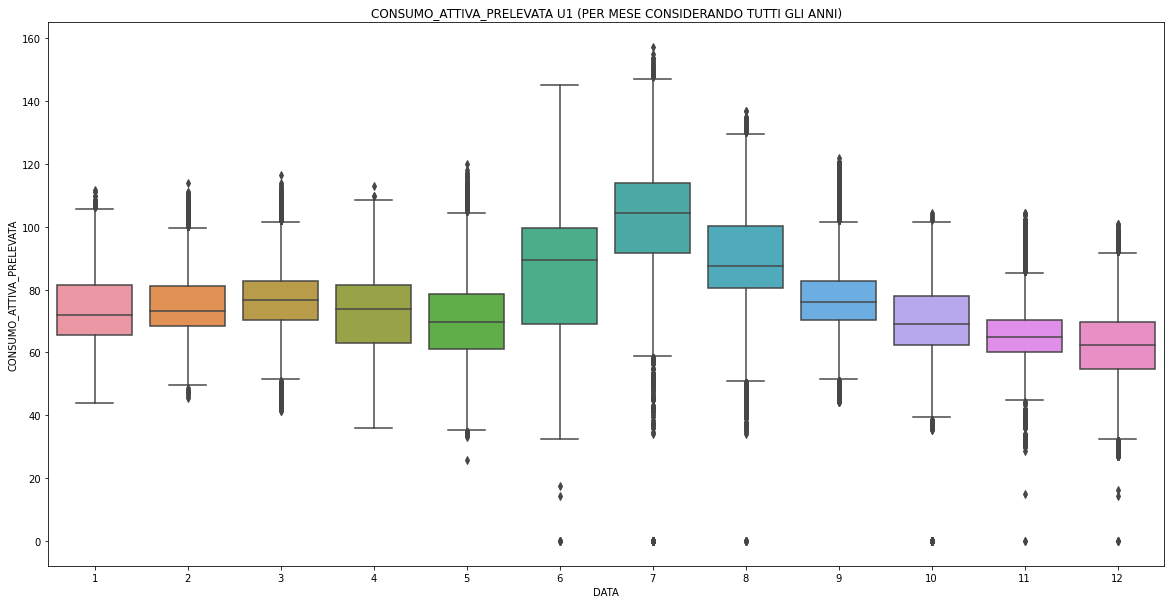

In [ ]:
fig, ax = plt.subplots(figsize= (20,10))
ax.set(xlabel = 'MESI', ylabel="Potenza CONSUMO_ATTIVA_PRELEVATA", title="CONSUMO_ATTIVA_PRELEVATA U1 (PER MESE CONSIDERANDO TUTTI GLI ANNI)")
sns.boxplot(x=data_u1['DATA'].dt.month,y='CONSUMO_ATTIVA_PRELEVATA',data=data_u1,ax=ax)
plt.show()

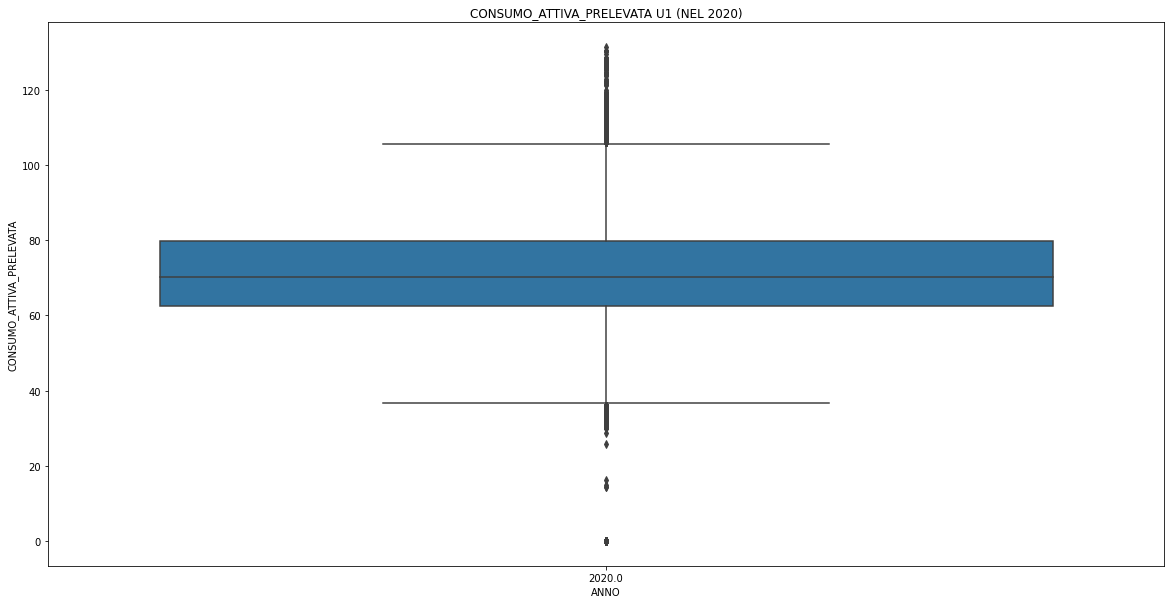

In [ ]:
fig, ax = plt.subplots(figsize= (20,10))
data_u1['ANNO'] = data_u1[data_u1['DATA'].dt.year == 2020]['DATA'].dt.year
ax.set(xlabel = 'MESI', ylabel="Potenza CONSUMO_ATTIVA_PRELEVATA", title="CONSUMO_ATTIVA_PRELEVATA U1 (NEL 2020)")
sns.boxplot(x=data_u1['ANNO'], y='CONSUMO_ATTIVA_PRELEVATA',data=data_u1,ax=ax)
plt.show()

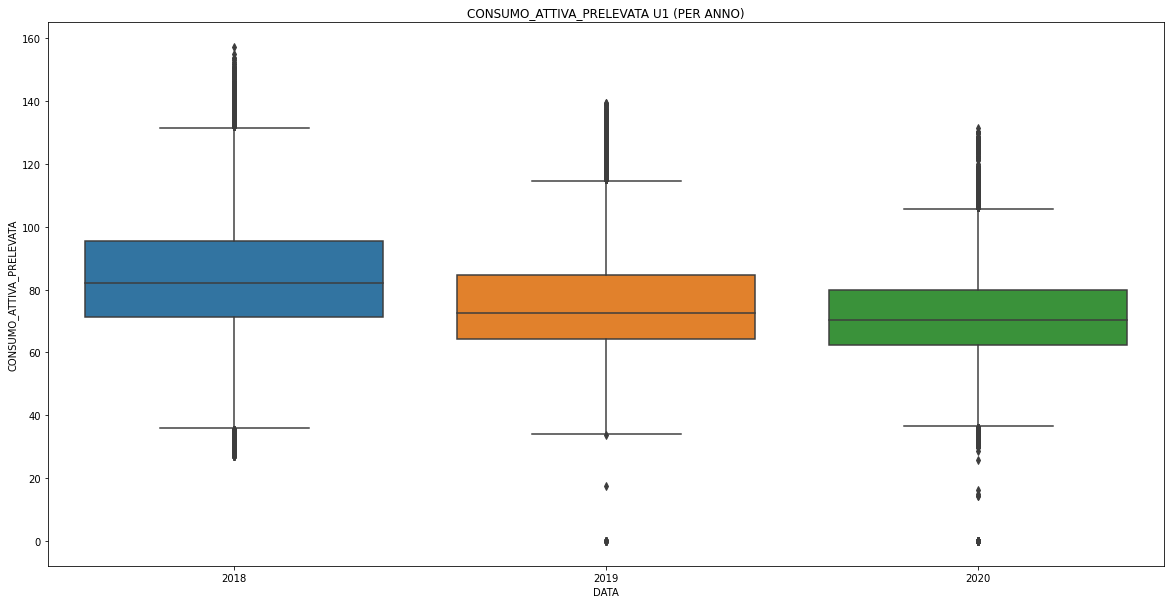

In [ ]:
fig, ax = plt.subplots(figsize= (20,10))
ax.set(xlabel = 'MESI', ylabel="Potenza CONSUMO_ATTIVA_PRELEVATA", title="CONSUMO_ATTIVA_PRELEVATA U1 (PER ANNO)")
sns.boxplot(x=data_u1['DATA'].dt.year, y='CONSUMO_ATTIVA_PRELEVATA', data=data_u1,ax=ax)
plt.show()

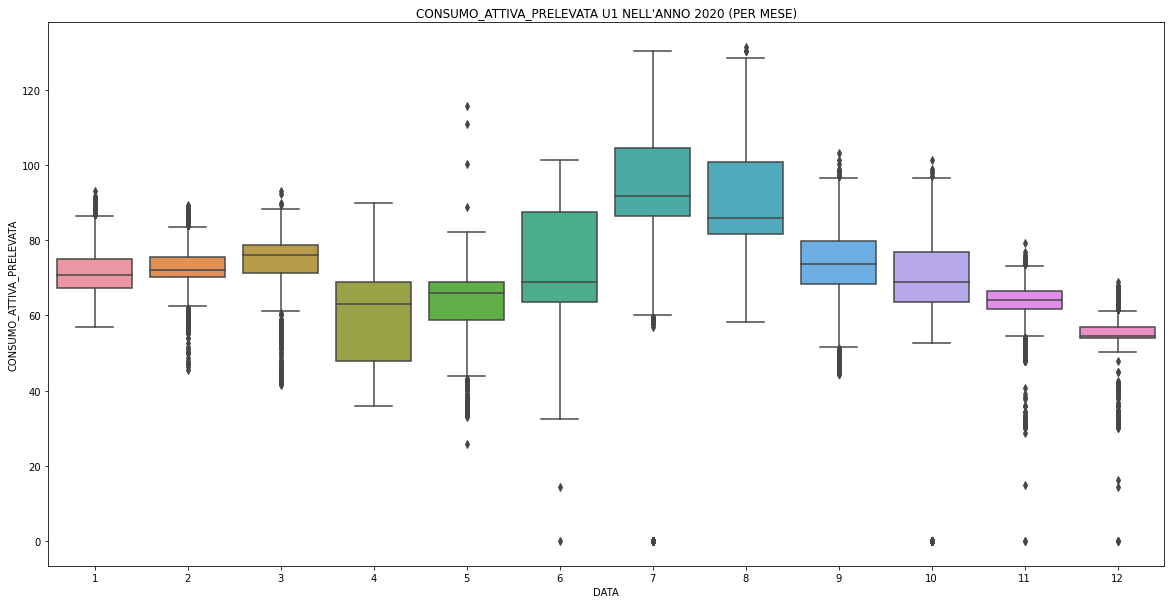

In [ ]:
fig, ax = plt.subplots(figsize= (20,10))
data_copy = data_u1[data_u1['DATA'].dt.year==2020]

ax.set(xlabel = 'MESI', ylabel="Potenza CONSUMO_ATTIVA_PRELEVATA", title="CONSUMO_ATTIVA_PRELEVATA U1 NELL'ANNO 2020 (PER MESE)")

sns.boxplot(x=data_copy['DATA'].dt.month, y='CONSUMO_ATTIVA_PRELEVATA', data=data_copy, ax=ax)
plt.show()

In [ ]:
for i in range (1,13):
  data = data_copy.copy()
  data = data[data['DATA'].dt.month == i]
  print(f"*********** MESE {i} ***********")
  print(data.describe())

*********** MESE 1 ***********
       FL_ORA_LEGALE  CONSUMO_ATTIVA_PRELEVATA  POTENZA_MASSIMA    ANNO
count         2976.0               2976.000000           2976.0  2976.0
mean             1.0                 71.382661            372.0  2020.0
std              0.0                  7.468129              0.0     0.0
min              1.0                 57.000000            372.0  2020.0
25%              1.0                 67.200000            372.0  2020.0
50%              1.0                 70.800000            372.0  2020.0
75%              1.0                 75.000000            372.0  2020.0
max              1.0                 93.000000            372.0  2020.0
*********** MESE 2 ***********
       FL_ORA_LEGALE  CONSUMO_ATTIVA_PRELEVATA  POTENZA_MASSIMA    ANNO
count         2784.0               2784.000000     2.784000e+03  2784.0
mean             1.0                 72.560776     3.576000e+02  2020.0
std              0.0                  6.781534     1.608958e-11     0.0
mi

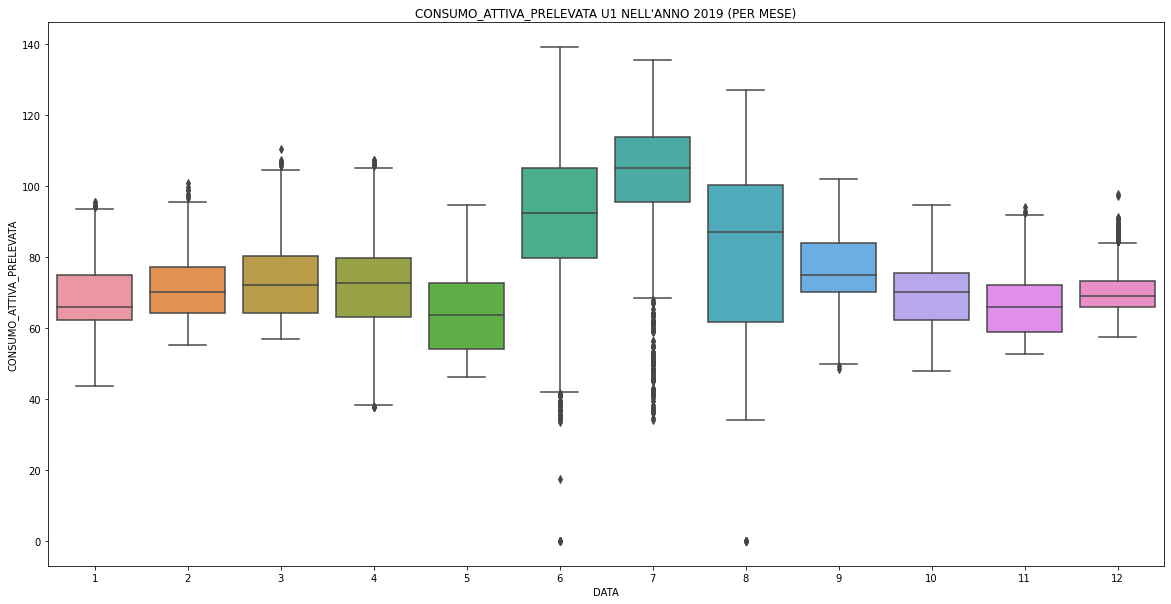

In [ ]:
fig, ax = plt.subplots(figsize= (20,10))
data_copy = data_u1[data_u1['DATA'].dt.year==2019]

ax.set(xlabel = 'MESI', ylabel="Potenza CONSUMO_ATTIVA_PRELEVATA", title="CONSUMO_ATTIVA_PRELEVATA U1 NELL'ANNO 2019 (PER MESE)")

sns.boxplot(x=data_copy['DATA'].dt.month, y='CONSUMO_ATTIVA_PRELEVATA', data=data_copy, ax=ax)
plt.show()

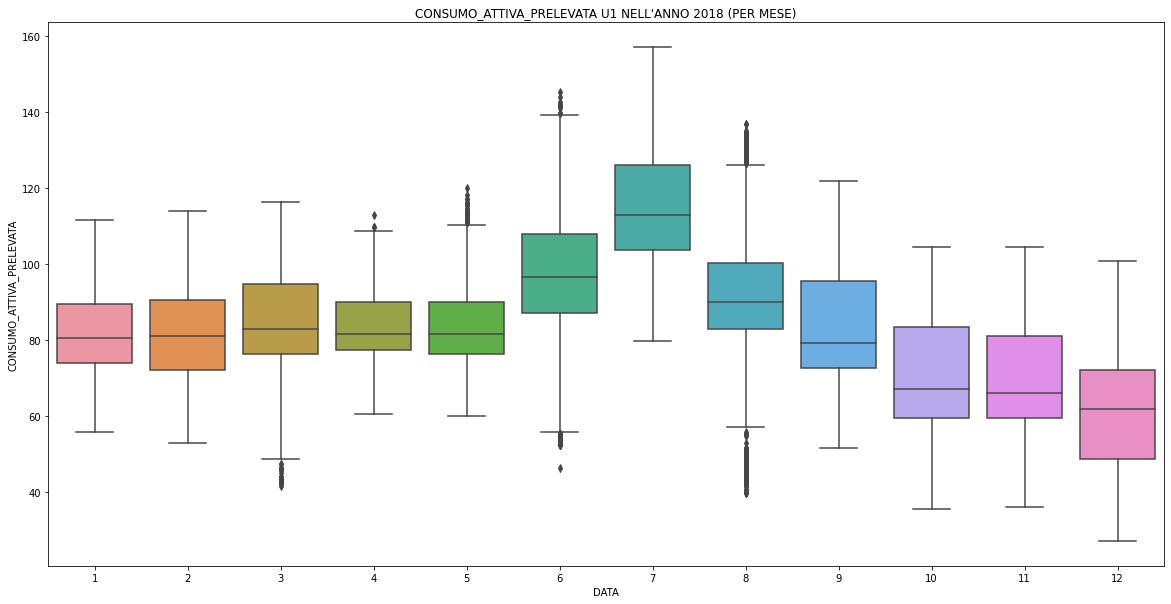

In [ ]:
fig, ax = plt.subplots(figsize= (20,10))
data_copy = data_u1[data_u1['DATA'].dt.year==2018]

ax.set(xlabel = 'MESI', ylabel="Potenza CONSUMO_ATTIVA_PRELEVATA", title="CONSUMO_ATTIVA_PRELEVATA U1 NELL'ANNO 2018 (PER MESE)")

sns.boxplot(x=data_copy['DATA'].dt.month, y='CONSUMO_ATTIVA_PRELEVATA', data=data_copy, ax=ax)
plt.show()

# **PREPROCESSING U1**

A partire dai dati (15 min) interpolati (Kalman) in R: 
*   aggrego per ore
*   join sul meteo


In [ ]:
path_u1 = '/content/drive/MyDrive/DS LAB/DATA/U1_15min_kalman.csv'
data_u1 = pd.read_csv(path_u1)
data_u1.head()

,DATA,ORA_y,CONSUMO_ATTIVA_PRELEVATA_y,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA_y,POTENZA_MASSIMA_y
0,2018-01-01 00:00:00,00:00:00,64.8,21.6,446.4
1,2018-01-01 00:15:00,00:15:00,66.0,25.2,446.4
2,2018-01-01 00:30:00,00:30:00,62.4,22.2,446.4
3,2018-01-01 00:45:00,00:45:00,64.8,22.8,446.4
4,2018-01-01 01:00:00,01:00:00,66.0,24.0,446.4


In [ ]:
data_u1['DATA'] = pd.to_datetime(data_u1['DATA'], format = '%Y-%m-%d %H:%M:%S')
data_u1.set_index('DATA', inplace=True)
# da 15 min raggruppo per ora
data_u1 = data_u1.resample('60min', offset=0).agg({'CONSUMO_ATTIVA_PRELEVATA_y':'sum', 
                                                           'CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA_y':'sum',
                                                           'POTENZA_MASSIMA_y': 'mean'})
data_u1.head()

,CONSUMO_ATTIVA_PRELEVATA_y,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA_y,POTENZA_MASSIMA_y
DATA,,,
2018-01-01 00:00:00,258.0,91.8,446.4
2018-01-01 01:00:00,257.4,93.0,446.4
2018-01-01 02:00:00,256.2,91.8,446.4
2018-01-01 03:00:00,254.4,91.2,446.4
2018-01-01 04:00:00,256.8,90.6,446.4


In [ ]:
dati_meteo = pd.read_csv("/content/drive/MyDrive/DS LAB/DATA/meteo_completo.csv", parse_dates = ['time'], index_col= 'time')
dati_meteo.drop(columns=['Unnamed: 0'], inplace=True)
dati_meteo.head(50)

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,kelvin,diff
time,,,,,,,,,,,,,
2017-12-01 00:00:00,1.8,0.8,93.6,NaN,NaN,40.0,6.1,NaN,1008.6,NaN,NaN,274.95,NaN
2017-12-01 01:00:00,2.0,1.2,94.4,NaN,NaN,60.0,8.2,NaN,1008.1,NaN,NaN,275.15,0.2
2017-12-01 02:00:00,2.6,2.6,100.0,NaN,NaN,60.0,5.4,NaN,1008.7,NaN,NaN,275.75,0.6
2017-12-01 03:00:00,2.0,0.9,92.8,NaN,NaN,60.0,5.0,NaN,1008.8,NaN,NaN,275.15,-0.6
2017-12-01 04:00:00,1.8,0.3,89.6,NaN,NaN,100.0,6.4,NaN,1008.2,NaN,NaN,274.95,-0.2
2017-12-01 05:00:00,0.8,-1.7,83.6,NaN,NaN,NaN,1.4,NaN,1009.0,NaN,NaN,273.95,-1.0
2017-12-01 06:00:00,-0.1,-2.2,86.0,NaN,NaN,100.0,4.3,NaN,1009.5,NaN,NaN,273.05,-0.9
2017-12-01 07:00:00,-0.2,-3.4,79.2,NaN,NaN,360.0,0.0,NaN,1010.0,NaN,NaN,272.95,-0.1
2017-12-01 08:00:00,0.8,-2.4,79.6,NaN,NaN,360.0,4.3,NaN,1010.1,NaN,NaN,273.95,1.0


In [ ]:
# MERGE DATI METEO
dati_meteo = pd.read_csv("/content/drive/MyDrive/DS LAB/DATA/meteo_completo.csv", parse_dates = ['time'], index_col= 'time')
dati_meteo.drop(columns=['Unnamed: 0'], inplace=True)
# join tra dati u6 (raggruppati per ora) e dati meteo (per ora)
u1_weather = pd.merge(data_u1, dati_meteo, how='left', left_index=True, right_index=True)
u1_weather['ONLY_DATA'] = u1_weather.index.date
u1_weather.head(50)

NameError: ignored

In [ ]:
u1_weather.to_csv("join_meteo_u1.csv")

# **PREPROCESSING U6**

In [ ]:
data_u6 = pd.read_csv(path_u6)
data_u6.dropna(subset = ['POD', 'DATA'], inplace=True)
data_u6['DATA'] = data_u6['DATA'].astype('int')
data_u6['CONSUMO_ATTIVA_PRELEVATA'] = data_u6['CONSUMO_ATTIVA_PRELEVATA'].astype(str).str.replace(',','.')
data_u6['CONSUMO_ATTIVA_PRELEVATA'] = pd.to_numeric(data_u6['CONSUMO_ATTIVA_PRELEVATA'], errors='coerce')
data_u6['CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA'] = data_u6['CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA'].astype(str).str.replace(',','.')
data_u6['CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA'] = pd.to_numeric(data_u6['CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA'], errors='coerce')
data_u6['POTENZA_MASSIMA'] = pd.to_numeric(data_u6['POTENZA_MASSIMA'], errors='coerce')
print(data_u6.dtypes)
data_u6.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


POD                                      object
DATA                                      int64
ORA                                     float64
FL_ORA_LEGALE                           float64
CONSUMO_ATTIVA_PRELEVATA                float64
CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA    float64
POTENZA_MASSIMA                         float64
TIPO_DATO                                object
dtype: object


(105286, 8)

In [ ]:
data_u6['DATA'] = pd.to_datetime(data_u6['DATA'], format = '%Y%m%d').dt.strftime('%Y-%m-%d')
data_u6.drop_duplicates(subset=['DATA','ORA'], keep = 'first', inplace=True)
data_u6['ORA'] = data_u6['ORA'].replace(dict_hours)
data_u6.head()

,POD,DATA,ORA,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO
0,IT012E00491824,2018-08-01,00:15,2.0,77.0,35.75,627.0,E
1,IT012E00491824,2018-08-01,00:30,2.0,77.0,36.30,627.0,E
2,IT012E00491824,2018-08-01,00:45,2.0,77.0,36.30,627.0,E
3,IT012E00491824,2018-08-01,01:00,2.0,78.1,36.85,627.0,E
4,IT012E00491824,2018-08-01,01:15,2.0,78.1,36.85,627.0,E


In [ ]:
data_u6['DATA'] = pd.to_datetime(data_u6['DATA'], format = '%Y-%m-%d').dt.date
# CONVERSIONE DA ORA LEGALE A SOLARE
data_u6['DATA'] = data_u6['DATA'].astype('str') + ' ' + data_u6['ORA']
data_u6['DATA'] = pd.to_datetime(data_u6['DATA'])
# sottraggo un'ora
data_u6.loc[data_u6['FL_ORA_LEGALE'] == 2, 'DATA'] = data_u6['DATA'] - timedelta(hours=1)

In [ ]:
data_u6['ORA'] = data_u6['DATA'].dt.time
data_u6.head()

,POD,DATA,ORA,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO
0,IT012E00491824,2018-07-31 23:15:00,23:15:00,2.0,77.0,35.75,627.0,E
1,IT012E00491824,2018-07-31 23:30:00,23:30:00,2.0,77.0,36.30,627.0,E
2,IT012E00491824,2018-07-31 23:45:00,23:45:00,2.0,77.0,36.30,627.0,E
3,IT012E00491824,2018-08-01 00:00:00,00:00:00,2.0,78.1,36.85,627.0,E
4,IT012E00491824,2018-08-01 00:15:00,00:15:00,2.0,78.1,36.85,627.0,E


## Creazione grafico con date ordinate (**U6**)

In [ ]:
# ordina i dati per data e ora
data_u6 = data_u6.sort_values(by=['DATA'])
# sostituisco i punti alle virgole
data_u6['CONSUMO_ATTIVA_PRELEVATA'] = data_u6['CONSUMO_ATTIVA_PRELEVATA'].astype(str).str.replace(",", ".").astype(float)
data_u6.head()

,POD,DATA,ORA,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO
20055,IT012E00491824,2018-01-01 00:15:00,00:15:00,1.0,91.30,35.75,888.8,E
20056,IT012E00491824,2018-01-01 00:30:00,00:30:00,1.0,91.85,36.30,888.8,E
20057,IT012E00491824,2018-01-01 00:45:00,00:45:00,1.0,90.20,35.20,888.8,E
20058,IT012E00491824,2018-01-01 01:00:00,01:00:00,1.0,91.85,37.40,888.8,E
20059,IT012E00491824,2018-01-01 01:15:00,01:15:00,1.0,91.85,37.40,888.8,E


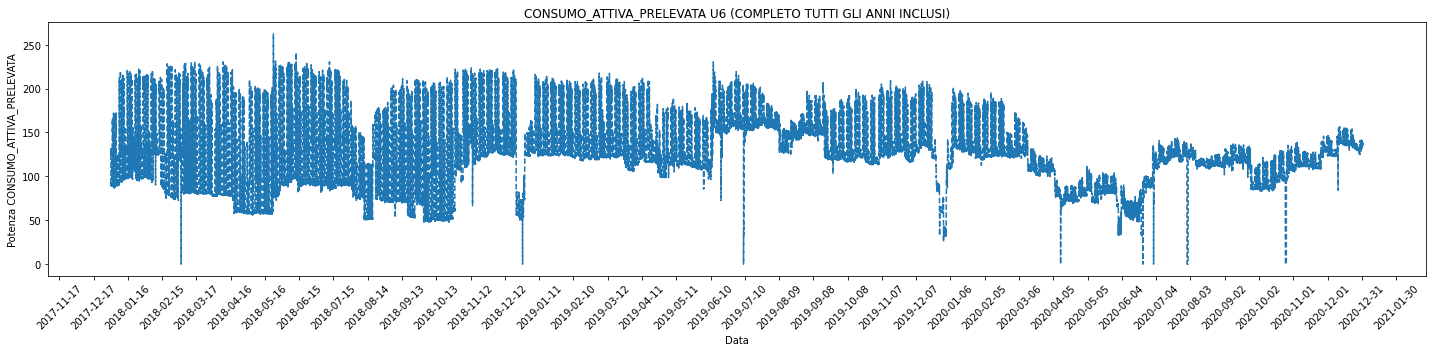

In [ ]:
# intervallo di giorni tra una data sull'asse x e l'altra
tick_spacing = 30

# crea lo spazio di plot
fig, ax = plt.subplots(figsize=(20, 5))

# matplotlib per visualizzare le x e le y e il colore
ax.plot(data_u6["DATA"], data_u6["CONSUMO_ATTIVA_PRELEVATA"].values  , linestyle='dashed')

# setta label asse x e y
ax.set(xlabel = "Data", ylabel="Potenza CONSUMO_ATTIVA_PRELEVATA", title="CONSUMO_ATTIVA_PRELEVATA U6 (COMPLETO TUTTI GLI ANNI INCLUSI)")

# setta la spaziatura fra le date
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# ruota le date di 45 gradi
plt.xticks(rotation=45)
fig.tight_layout()

# plotta
plt.show()

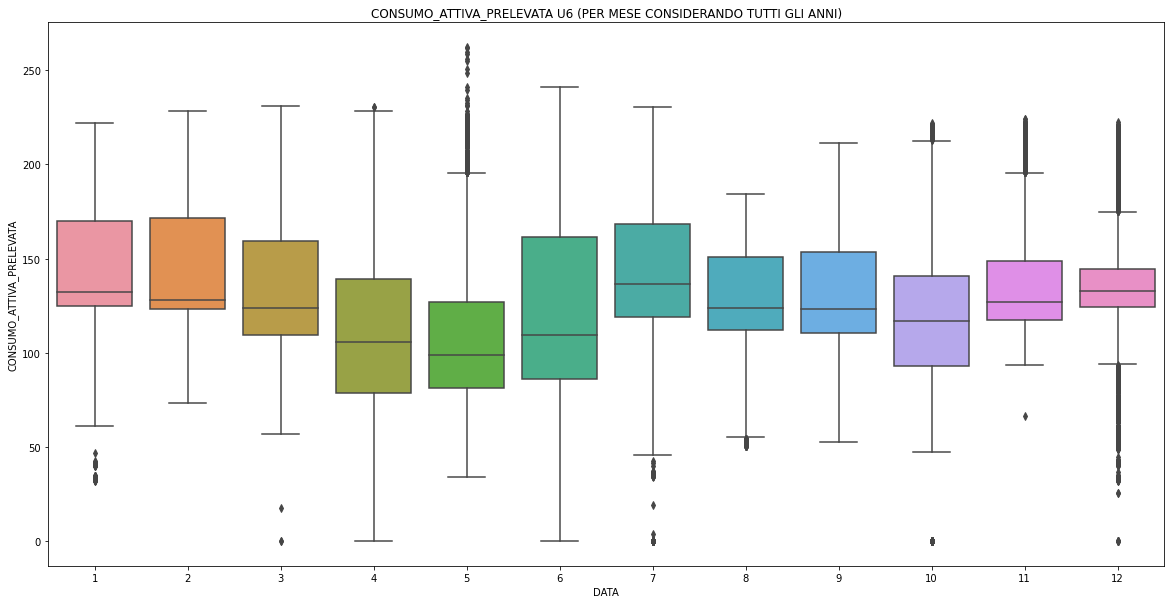

In [ ]:
fig, ax = plt.subplots(figsize= (20,10))
ax.set(xlabel = 'MESI', ylabel="Potenza CONSUMO_ATTIVA_PRELEVATA", title="CONSUMO_ATTIVA_PRELEVATA U6 (PER MESE CONSIDERANDO TUTTI GLI ANNI)")
sns.boxplot(x=data_u6['DATA'].dt.month,y='CONSUMO_ATTIVA_PRELEVATA',data=data_u6,ax=ax)
plt.show()

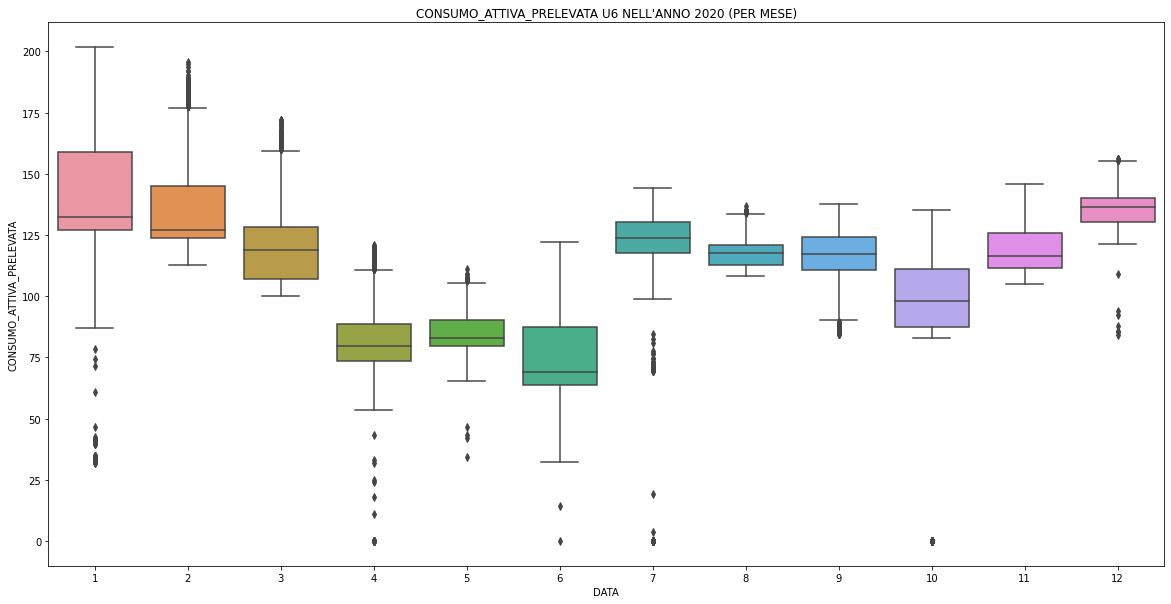

In [ ]:
fig, ax = plt.subplots(figsize= (20,10))
data_copy = data_u6[data_u6['DATA'].dt.year==2020]

ax.set(xlabel = 'MESI', ylabel="Potenza CONSUMO_ATTIVA_PRELEVATA", title="CONSUMO_ATTIVA_PRELEVATA U6 NELL'ANNO 2020 (PER MESE)")

sns.boxplot(x=data_copy['DATA'].dt.month, y='CONSUMO_ATTIVA_PRELEVATA', data=data_copy, ax=ax)
plt.show()

In [ ]:
data_u1.isna().sum()

CONSUMO_ATTIVA_PRELEVATA_y                0
CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA_y    0
POTENZA_MASSIMA_y                         0
dtype: int64

# STUDIO DELLA STAZIONARITÀ E DEI TREND (**U6**)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpt
import matplotlib.pyplot as plt

In [ ]:
data6_copy = data_u6.copy()[['DATA', 'CONSUMO_ATTIVA_PRELEVATA']]

In [ ]:
media = data6_copy['CONSUMO_ATTIVA_PRELEVATA'].mean()
# abbiamo sostituito gli zeri con la media della colonna per testare il model=multiplicative
data6_copy['CONSUMO_ATTIVA_PRELEVATA'] = data6_copy['CONSUMO_ATTIVA_PRELEVATA'].replace(0, media)

In [ ]:
data6_copy.set_index('DATA', inplace=True)
data6_copy.sort_index(inplace=True)

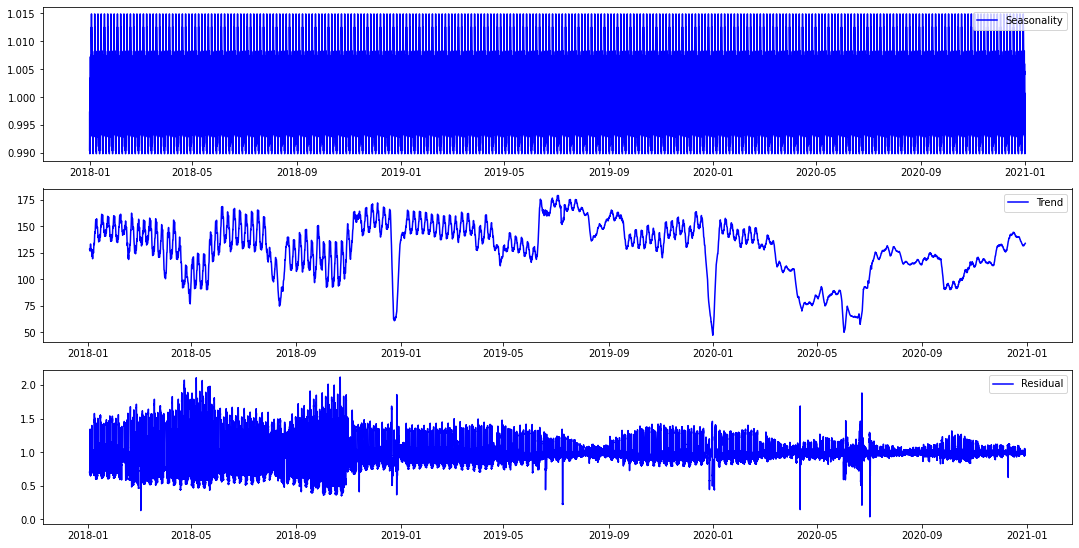

In [ ]:
decomposition = seasonal_decompose(data6_copy, model='multiplicative', freq=365)
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid

plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(seasonal, label="Seasonality", color='blue')
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend, label="Trend", color='blue')
plt.legend(loc="best")
plt.subplot(413)
plt.plot(residual, label="Residual", color='blue')
plt.legend(loc="best")
plt.tight_layout()

# AGGIUNTA DATE MANCANTI (SCRIPT ANDREA)

In [ ]:
data_u6.shape

(105181, 8)

In [ ]:
data_u6.set_index('DATA', inplace=True)
# genero date all'interno del range
list_date = pd.date_range('2018-01-01 00:00:00','2020-12-31 23:45:00', freq='15Min', closed='left')
# assegno nuovo indice, al posto delle date non presenti vengono inserite delle righe completamente vuote
data_u6 = data_u6.reindex(list_date)
data_u6.head()

,POD,ORA,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:15:00,IT012E00491824,00:15:00,1.0,91.30,35.75,888.8,E
2018-01-01 00:30:00,IT012E00491824,00:30:00,1.0,91.85,36.30,888.8,E
2018-01-01 00:45:00,IT012E00491824,00:45:00,1.0,90.20,35.20,888.8,E
2018-01-01 01:00:00,IT012E00491824,01:00:00,1.0,91.85,37.40,888.8,E


In [ ]:
# assegno l'ora del rispetto indice di riga alla colonna 'ora' che altrimenti sarebbe nulla per le nuove date
data_u6['ORA'] = data_u6.index.time
# elimino colonne inutili
data_u6.drop(columns=['POD', 'FL_ORA_LEGALE', 'TIPO_DATO'], inplace=True)
print(data_u6.shape)
data_u6.head()

(105215, 4)


,ORA,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA
2018-01-01 00:00:00,00:00:00,NaN,NaN,NaN
2018-01-01 00:15:00,00:15:00,91.30,35.75,888.8
2018-01-01 00:30:00,00:30:00,91.85,36.30,888.8
2018-01-01 00:45:00,00:45:00,90.20,35.20,888.8
2018-01-01 01:00:00,01:00:00,91.85,37.40,888.8


In [ ]:
data_u6.to_csv("U6_datacomp_cleaned.csv")

# ARRICCHIMENTO **U6** CON DATI METEO

In [ ]:
print(data_u6.isna().sum())
data_u6.head()

ORA                                         0
CONSUMO_ATTIVA_PRELEVATA                   35
CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA       35
POTENZA_MASSIMA                         20578
dtype: int64


,ORA,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA
2018-01-01 00:00:00,00:00:00,NaN,NaN,NaN
2018-01-01 00:15:00,00:15:00,91.30,35.75,888.8
2018-01-01 00:30:00,00:30:00,91.85,36.30,888.8
2018-01-01 00:45:00,00:45:00,90.20,35.20,888.8
2018-01-01 01:00:00,01:00:00,91.85,37.40,888.8


In [ ]:
# interpolazione potenza massima
data_u6['POTENZA_MASSIMA'] = data_u6['POTENZA_MASSIMA'].interpolate(method='nearest').ffill().bfill()
# da 15 min raggruppo per ora
data_u6 = data_u6.resample('60min', offset=0).agg({'CONSUMO_ATTIVA_PRELEVATA':'sum', 
                                                           'CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA':'sum',
                                                           'POTENZA_MASSIMA': 'mean'})
data_u6.head()

,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA
2018-01-01 00:00:00,273.35,107.25,888.8
2018-01-01 01:00:00,364.65,146.30,888.8
2018-01-01 02:00:00,363.00,145.75,888.8
2018-01-01 03:00:00,374.00,151.25,888.8
2018-01-01 04:00:00,494.45,206.80,888.8


In [ ]:
# DATI METEO
dati_meteo = pd.read_csv("/content/drive/MyDrive/DS LAB/DATA/meteo_completo.csv", parse_dates = ['time'], index_col= 'time')
dati_meteo.drop(columns=['Unnamed: 0'], inplace=True)
print(dati_meteo.dtypes)
dati_meteo.head()

temp      float64
dwpt      float64
rhum      float64
prcp      float64
snow      float64
wdir      float64
wspd      float64
wpgt      float64
pres      float64
tsun      float64
coco      float64
kelvin    float64
diff      float64
dtype: object


,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,kelvin,diff
time,,,,,,,,,,,,,
2017-12-01 00:00:00,1.8,0.8,93.6,NaN,NaN,40.0,6.1,NaN,1008.6,NaN,NaN,274.95,NaN
2017-12-01 01:00:00,2.0,1.2,94.4,NaN,NaN,60.0,8.2,NaN,1008.1,NaN,NaN,275.15,0.2
2017-12-01 02:00:00,2.6,2.6,100.0,NaN,NaN,60.0,5.4,NaN,1008.7,NaN,NaN,275.75,0.6
2017-12-01 03:00:00,2.0,0.9,92.8,NaN,NaN,60.0,5.0,NaN,1008.8,NaN,NaN,275.15,-0.6
2017-12-01 04:00:00,1.8,0.3,89.6,NaN,NaN,100.0,6.4,NaN,1008.2,NaN,NaN,274.95,-0.2


In [ ]:
# join tra dati u6 (raggruppati per ora) e dati meteo (per ora)
u6_weather = pd.merge(data_u6, dati_meteo, how='left', left_index=True, right_index=True)
u6_weather['temp'] = u6_weather['temp'].interpolate(method='nearest').ffill().bfill()
u6_weather.head()

,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,kelvin,diff
2018-01-01 00:00:00,273.35,107.25,888.8,3.2,2.5,95.0,NaN,NaN,160.0,1.8,NaN,1017.8,NaN,NaN,276.35,0.2
2018-01-01 01:00:00,364.65,146.30,888.8,3.0,2.0,93.0,NaN,NaN,350.0,1.8,NaN,1016.0,NaN,NaN,276.15,-0.2
2018-01-01 02:00:00,363.00,145.75,888.8,3.0,2.0,93.0,NaN,NaN,350.0,9.4,NaN,1015.0,NaN,7.0,276.15,0.0
2018-01-01 03:00:00,374.00,151.25,888.8,2.8,2.4,97.0,NaN,NaN,50.0,11.2,NaN,1015.8,NaN,7.0,275.95,-0.2
2018-01-01 04:00:00,494.45,206.80,888.8,3.0,2.0,93.0,NaN,NaN,80.0,5.4,NaN,1015.0,NaN,7.0,276.15,0.2


# CROSS CORRELATION U6

In [ ]:
# RAGGRUPPO PER GIORNO
u6_weather = u6_weather.resample('1d', offset=0).agg({'CONSUMO_ATTIVA_PRELEVATA':'mean', 
                                                           'CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA':'sum',
                                                           'POTENZA_MASSIMA': 'mean',
                                                           'temp':'mean',
                                                           'kelvin':'mean',
                                                           'dwpt':'mean',
                                                           'rhum':'mean',
                                                           'wdir': 'mean',
                                                           'wspd':'mean',
                                                           'pres':'mean'})
u6_weather.head()

,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,temp,kelvin,dwpt,rhum,wdir,wspd,pres
2018-01-01,458.562500,4527.05,888.8,3.375000,276.525000,2.633333,94.875000,193.913043,5.908333,1012.054167
2018-01-02,518.925000,5123.80,888.8,5.983333,279.133333,0.604167,73.375000,260.454545,8.491667,1014.270833
2018-01-03,526.327083,5417.50,888.8,4.170833,277.320833,-0.416667,73.666667,200.000000,5.941667,1009.673913
2018-01-04,525.777083,5326.20,888.8,6.141667,279.291667,2.079167,76.291667,168.095238,5.775000,1007.326087
2018-01-05,529.054167,5358.10,888.8,5.233333,278.383333,3.545833,89.291667,126.315789,5.158333,1009.629167


In [ ]:
import scipy.signal as ss

def ccf(x, y, lag_max = 100):

    result = ss.correlate(y - np.mean(y), x - np.mean(x), method='direct') / (np.std(y) * np.std(x) * len(y))
    length = (len(result) - 1) // 2
    lo = length - lag_max
    hi = length + (lag_max + 1)

    return result[lo:hi]

[-0.10672818 -0.11707681 -0.12320593 -0.12114152 -0.11919767 -0.11958004
 -0.12047287 -0.11793305 -0.12034407 -0.12391527 -0.11799126 -0.11389108
 -0.1098058  -0.10835517 -0.10787436 -0.11403286 -0.12067848 -0.11895031
 -0.11845031 -0.11776614 -0.11586214]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


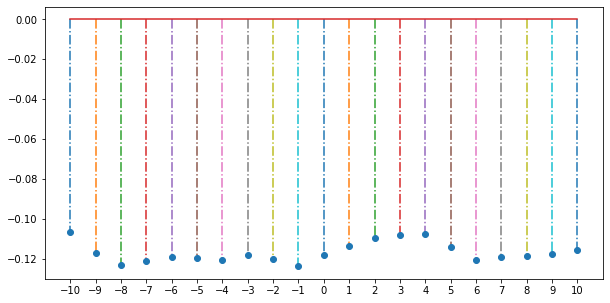

In [ ]:
n_lag = 10
list_cross_corr = ccf(u6_weather['CONSUMO_ATTIVA_PRELEVATA'], u6_weather['temp'], lag_max=n_lag)
print(list_cross_corr)
#Make a plot like ccf
f, ax = plt.subplots(figsize=(10, 5))
ax.stem(np.arange(-n_lag,n_lag+1), list_cross_corr, '-.')
ax.set_xticks(np.arange(-n_lag,n_lag+1))

plt.show()